<a href="https://colab.research.google.com/github/PeterPirog/tensorflow-deep-learning/blob/workspace/03_cnn_X_ray_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
# https://www.kaggle.com/nih-chest-xrays/data
# https://www.kaggle.com/bachrr/covid-chest-xray

# AUTOENCODER
# https://keras.io/examples/generative/vae/


import random
import zipfile
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



import tensorflow as tf
# set seed
tf.random.set_seed(42)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception

In [2]:
# X-ray dataset
#Unzip
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/datasets/pneumonia.zip')
zip_ref.extractall()
zip_ref.close()

In [3]:


for dirpath, dirnames, filenames in os.walk("/content/chest_xray/chest_xray"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 3 directories and 1 images in '/content/chest_xray/chest_xray'
There are 2 directories and 1 images in '/content/chest_xray/chest_xray/val'
There are 0 directories and 9 images in '/content/chest_xray/chest_xray/val/PNEUMONIA'
There are 0 directories and 9 images in '/content/chest_xray/chest_xray/val/NORMAL'
There are 2 directories and 1 images in '/content/chest_xray/chest_xray/train'
There are 0 directories and 3876 images in '/content/chest_xray/chest_xray/train/PNEUMONIA'
There are 0 directories and 1342 images in '/content/chest_xray/chest_xray/train/NORMAL'
There are 2 directories and 1 images in '/content/chest_xray/chest_xray/test'
There are 0 directories and 390 images in '/content/chest_xray/chest_xray/test/PNEUMONIA'
There are 0 directories and 234 images in '/content/chest_xray/chest_xray/test/NORMAL'


In [4]:
train_dir="/content/chest_xray/chest_xray/train/"
validation_dir="/content/chest_xray/chest_xray/val/"
test_dir="/content/chest_xray/chest_xray/test/"

#ges_train=len(os.listdir("pizza_steak/train/steak"))
#num_steak_images_train

In [5]:

data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted(item.name for item in data_dir.glob('*')))[1:]
print(class_names)


['NORMAL' 'PNEUMONIA']


In [6]:
# visualize images


def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (760, 1264)


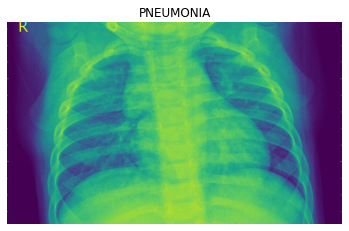

In [7]:
#Visualize data
img =view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

### 2. Preprocess data

In [8]:
#Image proprocessing
train_datagen =ImageDataGenerator(rescale=1./255)
                                  #rotation_range=40,
                                  #width_shift_range=0.1,
                                  #height_shift_range=0.1,
                                  #shear_range=0.1,
                                  #zoom_range=0.1,
                                  #horizontal_flip=True,
                                  #fill_mode='nearest')

valid_datagen =ImageDataGenerator(rescale=1./255)

In [9]:
# Import data from directories
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(299,299),
                                               color_mode="rgb", #"grayscale"
                                               interpolation="lanczos",
                                               class_mode="binary",
                                               seed=42,
                                               shuffle=False)

valid_data = valid_datagen.flow_from_directory(directory=test_dir, #validation_dir
                                               batch_size=32,
                                               target_size=(299,299),
                                               color_mode="rgb", #"grayscale"
                                               interpolation="lanczos",
                                               class_mode="binary",
                                               seed=42,
                                               shuffle=False)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### 3. Create model

In [10]:
# Create Imagenet Xception layer
conv_base=Xception(weights='imagenet',
                   include_top=False,
                   input_shape=(299,299,3)) #input_shape=(299,299,3))
conv_base.trainable=False #freeze weights to not train

In [11]:
model=tf.keras.models.Sequential()
model.add(conv_base)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dropout (Dropout)           (None, 204800)            0         
                                                                 
 dense (Dense)               (None, 1)                 204801    
                                                                 
Total params: 21,066,281
Trainable params: 204,801
Non-trainable params: 20,861,480
_________________________________________________________________


In [12]:
"""
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='valid',activation='relu', input_shape=(299,299,1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='valid',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='valid',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='valid',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='valid',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='valid',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))

model_xception.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model.summary()
"""

"\nmodel=tf.keras.models.Sequential()\nmodel.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='valid',activation='relu', input_shape=(299,299,1)))\nmodel.add(tf.keras.layers.MaxPool2D(pool_size=2))\nmodel.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='valid',activation='relu'))\nmodel.add(tf.keras.layers.MaxPool2D(pool_size=2))\nmodel.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='valid',activation='relu'))\nmodel.add(tf.keras.layers.MaxPool2D(pool_size=2))\nmodel.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='valid',activation='relu'))\nmodel.add(tf.keras.layers.MaxPool2D(pool_size=2))\nmodel.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='valid',activation='relu'))\nmodel.add(tf.keras.layers.MaxPool2D(pool_size=2))\nmodel.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='valid',activation='relu'))\nmodel.add(tf.keras.layers.MaxPool2D(pool_size=2))\n\nmodel.add(tf.keras.layers.Flatten())\nmodel.add(tf.kera

In [13]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [14]:
callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', #val_loss val_accuracy
                                                factor=0.5,
                                                patience=3,
                                                min_lr=1e-5),
           tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5),
           tf.keras.callbacks.ModelCheckpoint(filepath='my_model.h5',
                                              monitor='val_loss',
                                              save_best_only=True)]

In [ ]:
history=model.fit(train_data,
          epochs=100,
          steps_per_epoch=len(train_data), # len(train_data) - number of batches
          validation_data=valid_data,
          validation_steps=len(valid_data),
          callbacks=callbacks) 

Epoch 1/100
163/163 [==============================] - ETA: 0s - loss: 1.6150 - accuracy: 0.9009

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


163/163 [==============================] - 248s 1s/step - loss: 1.6150 - accuracy: 0.9009 - val_loss: 4.5523 - val_accuracy: 0.7019 - lr: 0.0010
Epoch 2/100
145/163 [=========================>....] - ETA: 21s - loss: 0.2695 - accuracy: 0.9567

In [ ]:
!wget https://fpnotebook.com/_media/lungPtxComplete_PA.jpg
steak=mpimg.imread("lungPtxComplete_PA.jpg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
img=tf.io.read_file(filename="lungPtxComplete_PA.jpg")
img=tf.image.decode_image(img)
img=tf.image.resize(img,size=[299,299])
img=img/255.
img.shape
model.predict(tf.expand_dims(img,axis=0))

In [ ]:
#############################################################

In [ ]:
# Create Imagenet Xception layer
conv_base=Xception(weights='imagenet',
                   include_top=False,
                   input_shape=(299,299,3))
conv_base.trainable=False #freeze weights to not train

In [ ]:
model_xception=tf.keras.models.Sequential()
model_xception.add(conv_base)
model_xception.add(tf.keras.layers.Flatten())
model_xception.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model_xception.summary()

In [ ]:
model_xception.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # 7.0795e-04
              metrics=["accuracy"])

In [ ]:
callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', #val_loss
                                                factor=0.5,
                                                patience=3,
                                                min_lr=1e-5),
           tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                            patience=5),
           tf.keras.callbacks.ModelCheckpoint(filepath='my_model.h5',
                                              monitor='val_accuracy',
                                              save_best_only=True)]

In [ ]:
history=model_xception.fit(train_data,
          epochs=100,
          steps_per_epoch=len(train_data), # len(train_data) - number of batches
          validation_data=valid_data,
          validation_steps=len(valid_data),
          callbacks=callbacks) 

In [ ]:
print(history.history.keys())
#pd.DataFrame(history.history).plot()
#plt.ylabel("loss")
#plt.xlabel("epochs")
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

In [ ]:
plt.plot(epochs,loss,'bo',label='Train loss')
plt.plot(epochs,val_loss,'g',label='Validation loss')
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
plt.plot(epochs,acc,'bo',label='Train metric')
plt.plot(epochs,val_acc,'g',label='Validation metric')
plt.title('Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend();

In [ ]:

!wget https://st.depositphotos.com/1020804/1448/i/950/depositphotos_14480443-stock-photo-beef-steak.jpg
steak=mpimg.imread("depositphotos_14480443-stock-photo-beef-steak.jpg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
img=tf.io.read_file(filename="depositphotos_14480443-stock-photo-beef-steak.jpg")
img=tf.image.decode_image(img)
img=tf.image.resize(img,size=[299,299])
img=img/255.
img.shape
model.predict(tf.expand_dims(img,axis=0))